 <H1>Suicide Rate Prediction<H1>

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from scipy import stats

<H6>Import Data<H6>

In [2]:
suicide = pd.read_csv("C:/Users/SANJAY/Desktop/Bharu/Capstone Project/Suicide/master.csv")

In [3]:
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
suicide.columns = ['country', 'year', 'gender', 'age', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI',
                'gdp_year', 'per_capita', 'generation']

In [6]:
suicide.columns

Index(['country', 'year', 'gender', 'age', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI', 'gdp_year', 'per_capita',
       'generation'],
      dtype='object')

<H6>Understanding the Data<H6>

In [7]:
suicide.shape

(27820, 12)

In [8]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        27820 non-null  object 
 1   year           27820 non-null  int64  
 2   gender         27820 non-null  object 
 3   age            27820 non-null  object 
 4   suicide_count  27820 non-null  int64  
 5   population     27820 non-null  int64  
 6   suicide_rate   27820 non-null  float64
 7   country-year   27820 non-null  object 
 8   HDI            8364 non-null   float64
 9   gdp_year       27820 non-null  object 
 10  per_capita     27820 non-null  int64  
 11  generation     27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [9]:
suicide.describe()

,year,suicide_count,population,suicide_rate,HDI,per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [10]:
suicide.isnull().sum()

country              0
year                 0
gender               0
age                  0
suicide_count        0
population           0
suicide_rate         0
country-year         0
HDI              19456
gdp_year             0
per_capita           0
generation           0
dtype: int64

In [11]:
suicide.isnull().mean()

country          0.000000
year             0.000000
gender           0.000000
age              0.000000
suicide_count    0.000000
population       0.000000
suicide_rate     0.000000
country-year     0.000000
HDI              0.699353
gdp_year         0.000000
per_capita       0.000000
generation       0.000000
dtype: float64

<H0>Since null is nearly 70% in HDI, it is excluded<H0>

In [12]:
suicide = suicide.drop(['HDI','country-year'], axis = 1)

In [13]:
suicide = suicide.dropna()

<H6>Plots - Visualization<H6>

<H0>Visualisation Tableau Link - <H0>

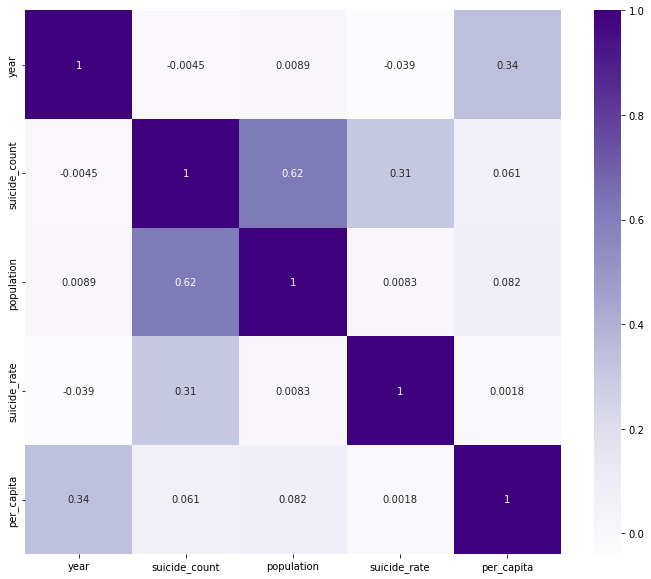

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(suicide.corr(), annot=True, cmap='Purples')
plt.show()

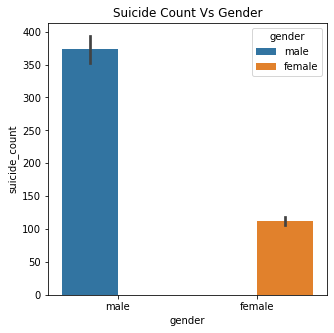

In [15]:
plt.figure(figsize=(5,5))
sns.barplot(x = "gender", y = "suicide_count", hue = "gender", data = suicide)
plt.title('Suicide Count Vs Gender')
plt.show()

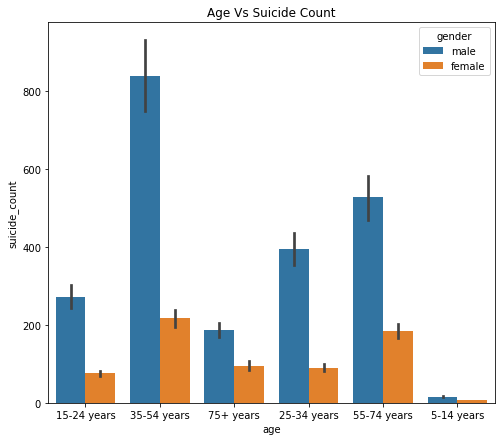

In [16]:
plt.figure(figsize=(8,7))
sns.barplot(x = "age", y = "suicide_count", hue = "gender", data = suicide)
plt.title("Age Vs Suicide Count")
plt.show()

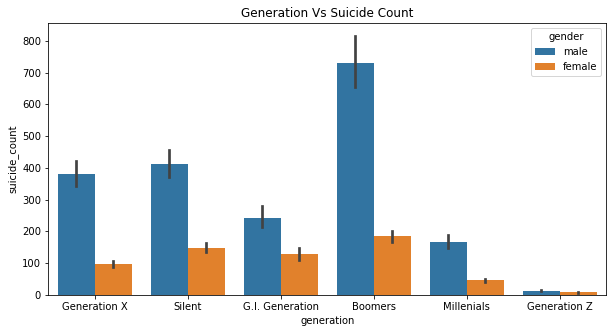

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x = "generation", y = "suicide_count", hue = "gender", data = suicide)
plt.title('Generation Vs Suicide Count')
plt.show()

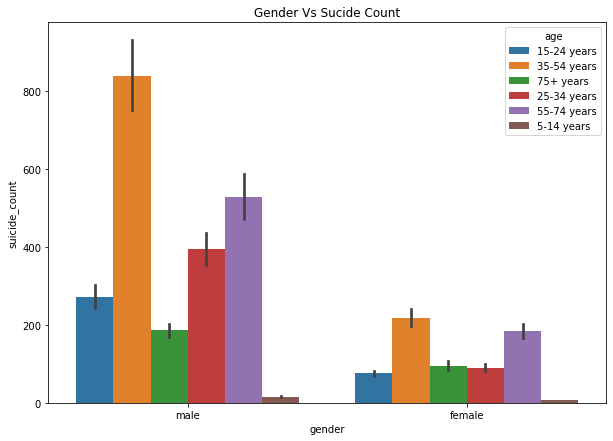

In [18]:
plt.figure(figsize=(10,7))
sns.barplot(x="gender", y="suicide_count", hue="age", data=suicide)
plt.title('Gender Vs Sucide Count')
plt.show()

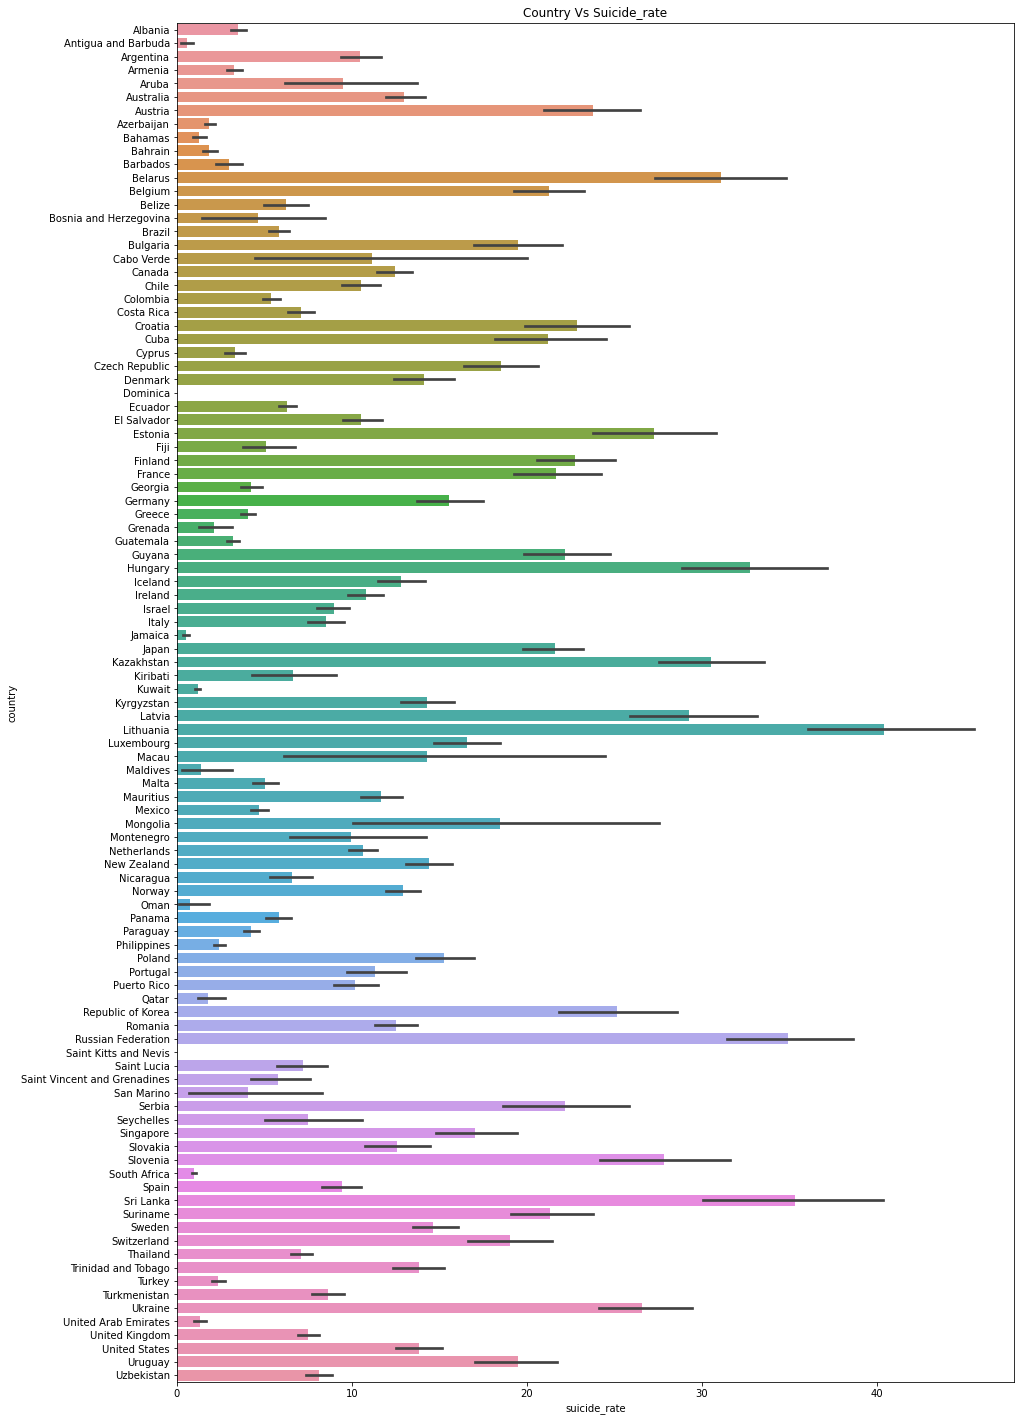

In [19]:
plt.figure(figsize=(15,25))
sns.barplot(x = "suicide_rate", y = "country", data = suicide)
plt.title('Country Vs Suicide_rate')
plt.show()

<AxesSubplot:xlabel='year', ylabel='suicide_count'>

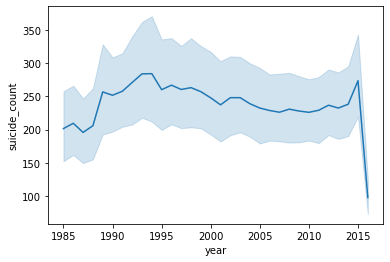

In [20]:
sns.lineplot(data=suicide, x="year", y="suicide_count")

<H6>Statistical Tests<H6>

<H6>T – Test : Male and Female Suicide Rates<H6>

<H0>
H0: There is no difference in the suicide rates among male and female
<Br>
H1: There is difference in the suicide rates among male and female
<H0>

In [21]:
male = suicide['suicide_rate'][suicide['gender'] == 0]

In [22]:
female = suicide['suicide_rate'][suicide['gender'] == 1]

In [23]:
ttest,pval = stats.ttest_rel(male,female)

if pval<0.05:
    print("Null is rejected")
else:
    print("Null is accepted")

Null is accepted


<H6>Chi – Squared Test : Age & Suicide Rates<H6>

<H0>
H0: Suicide rate and age are independent
<Br>
H1: Suicide rate and age are dependent
<H0>

In [24]:
contingency_table = pd.crosstab(suicide.suicide_rate,suicide.age)

In [25]:
alpha=0.05

In [26]:
chistat,p,dof,expected=stats.chi2_contingency(contingency_table)

In [27]:
critical_values=stats.chi2.ppf(q=1-alpha,df=dof)
print('critical_values',critical_values)

critical_values 26864.700169422224


In [28]:
if chistat>=critical_values:
    print("Reject H0, since there is a relationship between Age group and Suicide Rate")
else:
    print("Accept H0, since there is no relationship between Age group and Suicide Rate")
    
if p<=alpha:
    print("Reject H0, since there is a relationship between Age group and Suicide Rate")
else:
    print("Accept H0, since there is no relationship between Age group and Suicide Rate")

Reject H0, since there is a relationship between Age group and Suicide Rate
Reject H0, since there is a relationship between Age group and Suicide Rate


<H6>Outlier<H6>

In [29]:
suicide=suicide.sort_values(by=["suicide_rate"])

In [30]:
q1=suicide["suicide_rate"].quantile(0.25)
print(q1)

0.92


In [31]:
q3=suicide["suicide_rate"].quantile(0.75)
print(q3)

16.62


In [32]:
IQR=q3-q1
print(IQR)

15.700000000000001


In [33]:
lower_extreme=q1-1.5*IQR
print(lower_extreme)

-22.63


In [34]:
upper_extreme=q3+1.5*IQR
print(upper_extreme)

40.17


In [35]:
suicide=suicide[(suicide.suicide_rate<upper_extreme)&(suicide.suicide_rate>lower_extreme)]
suicide=suicide.sort_index().reset_index(drop=True)

<H6>Label Encoding<H6>

In [36]:
label = ['country', 'year','age', 'gender', 'generation']
le = sklearn.preprocessing.LabelEncoder()
for column in label:
    suicide[column] = le.fit_transform(suicide[column])

In [37]:
suicide.head()

,country,year,gender,age,suicide_count,population,suicide_rate,gdp_year,per_capita,generation
0,0,2,1,0,21,312900,6.71,"2,156,624,900",796,2
1,0,2,1,2,16,308000,5.19,"2,156,624,900",796,5
2,0,2,0,0,14,289700,4.83,"2,156,624,900",796,2
3,0,2,1,5,1,21800,4.59,"2,156,624,900",796,1
4,0,2,1,1,9,274300,3.28,"2,156,624,900",796,0


In [38]:
suicide.dtypes

country            int32
year               int64
gender             int32
age                int32
suicide_count      int64
population         int64
suicide_rate     float64
gdp_year          object
per_capita         int64
generation         int32
dtype: object

<H0>Converting Object to Float Datatype<H0>

In [39]:
suicide['gdp_year'] = suicide['gdp_year'].str.replace(',','').astype(float)

In [40]:
suicide.dtypes

country            int32
year               int64
gender             int32
age                int32
suicide_count      int64
population         int64
suicide_rate     float64
gdp_year         float64
per_capita         int64
generation         int32
dtype: object

<H6>Scaling<H6>

In [41]:
num = ['suicide_count', 'population', 'suicide_rate', 
              'gdp_year','per_capita']
robust = RobustScaler()
suicide[num] = robust.fit_transform(suicide[num])

<H6>Splitting<H6>

In [42]:
x = suicide[['country','year','gender','age','suicide_count','population','gdp_year','per_capita','generation']]
y = suicide['suicide_rate']

In [43]:
x.shape

(25774, 9)

In [44]:
y.shape

(25774,)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [46]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20619, 9), (5155, 9), (20619,), (5155,))

<H6>Model<H6>

<H6>Linear Regression<H6>

In [47]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [48]:
ytrain_pred = lr_model.predict(x_train)
ytest_pred = lr_model.predict(x_test)

In [49]:
lr_model.score(x_train, y_train)

0.2840937906171217

In [50]:
lr_model.score(x_test, y_test)

0.2741572438306442

Text(0.5, 1.0, 'Train - Actual vs Predicted')

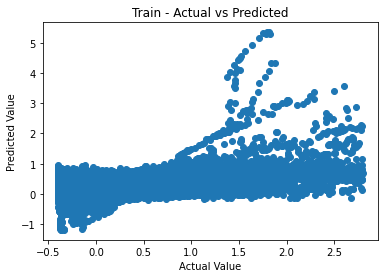

In [51]:
plt.scatter(y_train,ytrain_pred)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Train - Actual vs Predicted")

Text(0.5, 1.0, 'Test - Actual vs Predicted')

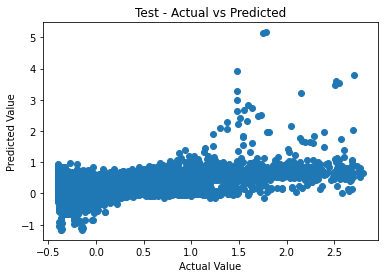

In [52]:
plt.scatter(y_test,ytest_pred)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Test - Actual vs Predicted")

<H6>Decision Tree<H6>

In [53]:
tree_model = DecisionTreeRegressor(max_depth=9)
tree_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [54]:
ytrain_pred = tree_model.predict(x_train)
ytest_pred = tree_model.predict(x_test)

In [55]:
train_score = tree_model.score(x_train, y_train)
print(train_score)

0.975976274808679


In [56]:
test_score = tree_model.score(x_test, y_test)
test_score

0.9690467055126014

In [57]:
train_accuracy = []
test_accuracy = []
depth = range(1, 21)
for n in depth:
  tree = DecisionTreeRegressor(max_depth=n)
  tree.fit(x_train, y_train)
  train_accuracy.append(tree.score(x_train, y_train))
  test_accuracy.append(tree.score(x_test, y_test))

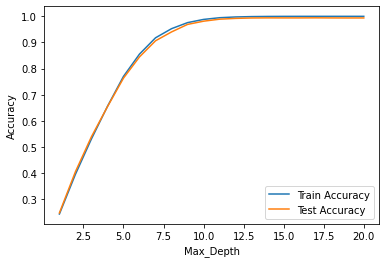

In [58]:
plt.plot(depth, train_accuracy, label="Train Accuracy")
plt.plot(depth, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("Max_Depth")
plt.legend()

<H6>Random Forest<H6>

In [59]:
forest_model = RandomForestRegressor(max_depth=9)
forest_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=9)

In [60]:
ytrain_pred = forest_model.predict(x_train)
ytest_pred = forest_model.predict(x_test)

In [61]:
train_score = forest_model.score(x_train, y_train)
print(train_score)

0.9912835214026613


In [62]:
test_score = forest_model.score(x_test, y_test)
test_score

0.9878393830466817

In [63]:
train_accuracy = []
test_accuracy = []
depth = range(1, 21)
for n in depth:
  forest = RandomForestRegressor(max_depth=n)
  forest.fit(x_train, y_train)
  train_accuracy.append(forest.score(x_train, y_train))
  test_accuracy.append(forest.score(x_test, y_test))

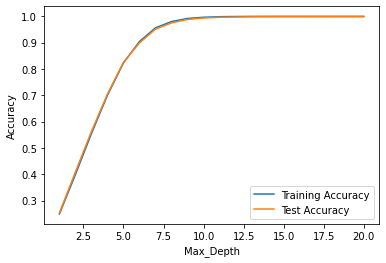

In [64]:
plt.plot(depth, train_accuracy, label="Training Accuracy")
plt.plot(depth, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("Max_Depth")
plt.legend()

<H6>Gradient Boosted Regression<H6>

In [65]:
GB_model = GradientBoostingRegressor(learning_rate=0.5)
GB_model.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.5)

In [66]:
ytrain_pred = GB_model.predict(x_train)
ytest_pred = GB_model.predict(x_test)

In [67]:
train_score = GB_model.score(x_train, y_train)
print(train_score)

0.9908466048148356


In [68]:
test_score = GB_model.score(x_test, y_test)
test_score

0.9879689601417879

In [69]:
train_accuracy = []
test_accuracy = []
r = []
rate = range(1, 10)
for n in rate:
  gb = GradientBoostingRegressor(learning_rate=n*0.1)
  gb.fit(x_train, y_train)
  r.append(n*0.1)
  train_accuracy.append(gb.score(x_train, y_train))
  test_accuracy.append(gb.score(x_test, y_test))

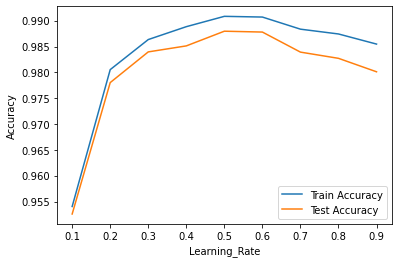

In [70]:
plt.plot(r, train_accuracy, label="Train Accuracy")
plt.plot(r, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("Learning_Rate")
plt.legend()

<H6>Bagging Regressor<H6>

In [71]:
BR_model = BaggingRegressor(n_estimators=10)
BR_model.fit(x_train, y_train)

BaggingRegressor()

In [72]:
ytrain_pred = BR_model.predict(x_train)
ytest_pred = BR_model.predict(x_test)

In [73]:
train_score = BR_model.score(x_train, y_train)
print(train_score)

0.9993638198450171


In [74]:
test_score = BR_model.score(x_test, y_test)
test_score

0.9973756795451465

In [75]:
train_accuracy = []
test_accuracy = []
est = range(1, 31)
for n in est:
  BR = BaggingRegressor(n_estimators=n)
  BR.fit(x_train, y_train)
  train_accuracy.append(BR.score(x_train, y_train))
  test_accuracy.append(BR.score(x_test, y_test))

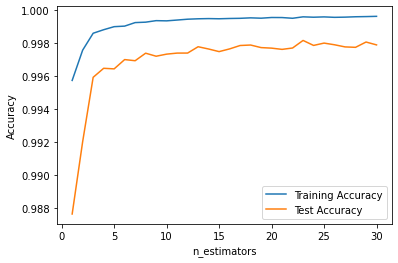

In [76]:
plt.plot(est, train_accuracy, label="Training Accuracy")
plt.plot(est, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend()

<H6>Support Vector Machine<H6>

In [77]:
SV_model = SVR(kernel='rbf')
SV_model.fit(x_train,y_train)

SVR()

In [78]:
ytrain_pred = SV_model.predict(x_train)
ytest_pred = SV_model.predict(x_test)

In [79]:
train_score = SV_model.score(x_train, y_train)
print(train_score)

0.39616536562110494


In [80]:
test_score = SV_model.score(x_test, y_test)
test_score

0.39328552916025505

Text(0.5, 1.0, 'Train - Actual vs Predicted')

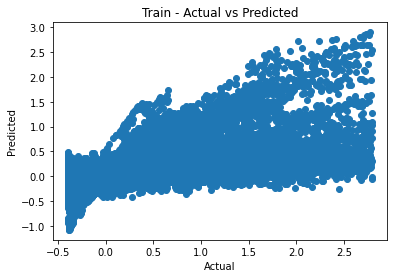

In [81]:
plt.scatter(y_train,ytrain_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Train - Actual vs Predicted")

Text(0.5, 1.0, 'Test - Actual vs Predicted')

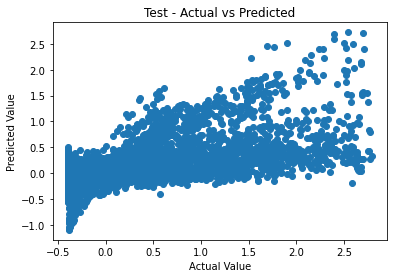

In [82]:
plt.scatter(y_test,ytest_pred)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Test - Actual vs Predicted")